The increase in temperature is bad for plant health and increases risk of wildfire

The NDVI is one of several indexes mentioned in
literature dealing with plant health. The United States
Forest Service uses it in assessing wildfire risk

Four band imagery is useful in agriculture because a
bright red color is an indication of healthy vegetation.
Variations in the red color can indicate stressed
vegetation. These stresses can include a lack of fertility,
insect infestation, soil deficiencies, and over or under
watering.

#predict NDVI and R_NAIP

In [2]:
import pandas as pd
rtree= pd.read_excel('../Data/Aggregated by Block Groups/RD_Aggregated_BG_LC_Data_0331.xlsx', sheet_name=1)

In [3]:
rtree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GEOID10             307 non-null    float64
 1   B_NAIP              307 non-null    float64
 2   G_NAIP              307 non-null    float64
 3   R_NAIP              307 non-null    float64
 4   NIR_NAIP            307 non-null    float64
 5   NDVI                307 non-null    float64
 6   NDBI                307 non-null    float64
 7   ESA_LC_MODE         307 non-null    float64
 8   Impervious_Surface  307 non-null    float64
 9   Tree_Coverage       307 non-null    float64
 10  RD_LST_0723         307 non-null    float64
 11  RD_LST_0808         307 non-null    float64
 12  RD_LST_Composite    307 non-null    float64
 13  RD_MODIS_0721       307 non-null    float64
 14  RD_MODIS_0724       304 non-null    float64
 15  am_hi               307 non-null    float64
 16  am_t    

In [5]:
#find the average temperature
rtree['avg_t']=(rtree['am_t']+rtree['af_t']+rtree['pm_t'])/3
rtree.columns

Index(['GEOID10', 'B_NAIP', 'G_NAIP', 'R_NAIP', 'NIR_NAIP', 'NDVI', 'NDBI',
       'ESA_LC_MODE', 'Impervious_Surface', 'Tree_Coverage', 'RD_LST_0723',
       'RD_LST_0808', 'RD_LST_Composite', 'RD_MODIS_0721', 'RD_MODIS_0724',
       'am_hi', 'am_t', 'af_hi', 'af_t', 'pm_hi', 'pm_t', 'avg_t'],
      dtype='object')

In [9]:
training_data= rtree.drop(['GEOID10', 'B_NAIP', 'G_NAIP', 'R_NAIP', 'NIR_NAIP', 'NDBI','ESA_LC_MODE', 'Impervious_Surface', 'Tree_Coverage', 'RD_LST_0723','RD_LST_0808', 'RD_LST_Composite', 'RD_MODIS_0721', 'RD_MODIS_0724', 'am_hi', 'am_t', 'af_hi', 'af_t', 'pm_hi', 'pm_t'], axis=1)
training_data.describe()

,NDVI,avg_t
count,307.000000,307.000000
mean,0.472932,77.559447
std,0.082481,0.571338
min,0.192321,76.128906
25%,0.428585,77.192970
50%,0.488954,77.547765
75%,0.528623,77.951040
max,0.675937,79.488749


In [12]:
#anu column has nan
training_data.columns[training_data.isna().any()].tolist()

[]

In [13]:
#check if there are any nan
training_data.isnull().values.any()

False

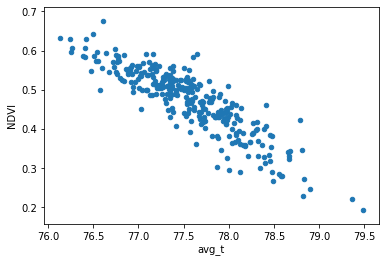

In [16]:
training_data.plot.scatter('avg_t', 'NDVI')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(training_data.avg_t, training_data.NDVI, test_size = 0.2)

In [19]:
x_train

290    78.038455
138    76.602809
174    77.589577
118    77.360591
130    77.353208
         ...    
71     76.886622
188    78.125933
210    78.456347
272    78.309598
105    77.467992
Name: avg_t, Length: 245, dtype: float64

In [20]:
x_test

289    78.075704
146    78.269648
76     77.272219
258    77.535787
5      78.652489
         ...    
84     77.591062
216    77.165525
152    77.862310
9      76.764346
255    77.344660
Name: avg_t, Length: 62, dtype: float64

In [21]:
y_train

290    0.365151
138    0.675937
174    0.475530
118    0.516094
130    0.494926
         ...   
71     0.539641
188    0.362597
210    0.384009
272    0.399049
105    0.524237
Name: NDVI, Length: 245, dtype: float64

In [22]:
y_test

289    0.384145
146    0.416360
76     0.525686
258    0.467949
5      0.341339
         ...   
84     0.470296
216    0.515392
152    0.431430
9      0.571781
255    0.500412
Name: NDVI, Length: 62, dtype: float64

In [24]:
import numpy as np
model = LinearRegression()
model.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [25]:
preds = model.predict(np.array(x_test).reshape(-1,1))

In [26]:
y_test.head()

289    0.384145
146    0.416360
76     0.525686
258    0.467949
5      0.341339
Name: NDVI, dtype: float64

In [27]:
preds

array([0.40608857, 0.38118321, 0.50926808, 0.47542204, 0.33202073,
       0.55134287, 0.41766277, 0.38497574, 0.54360105, 0.49806096,
       0.46568026, 0.5011618 , 0.43116278, 0.49075088, 0.57856432,
       0.49471617, 0.36482533, 0.4433898 , 0.47506574, 0.49913377,
       0.46457088, 0.40592463, 0.53715607, 0.4020067 , 0.35719128,
       0.31498684, 0.47376564, 0.3086506 , 0.45042425, 0.51123603,
       0.55395058, 0.60152492, 0.50304223, 0.49868929, 0.49078321,
       0.40098386, 0.44467128, 0.56553751, 0.3630014 , 0.41130596,
       0.49603456, 0.4725511 , 0.37465429, 0.36574725, 0.50782951,
       0.47645043, 0.61996407, 0.33052893, 0.57646312, 0.46807929,
       0.47594227, 0.42238767, 0.47590929, 0.40402232, 0.55431537,
       0.38492741, 0.47306644, 0.4683239 , 0.52296927, 0.43349159,
       0.57448668, 0.49996556])

In [30]:
residuals = preds - y_test

(array([ 1.,  1.,  0.,  4.,  9.,  7., 10., 15.,  8.,  7.]),
 array([-0.10824098, -0.09223143, -0.07622189, -0.06021234, -0.0442028 ,
        -0.02819325, -0.01218371,  0.00382584,  0.01983539,  0.03584493,
         0.05185448]),
 <a list of 10 Patch objects>)

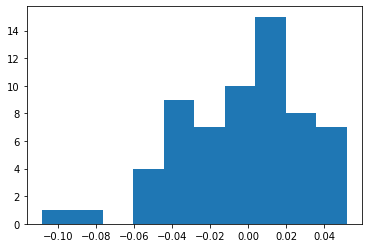

In [32]:
import matplotlib.pyplot as plt
plt.hist(residuals)

In [35]:
mean_squared_error(y_test, preds) ** 0.5

0.032201163375882406

In [64]:
def predict_plant_health(temperature):
    test=pd.Series(np.array([temperature]))
    NDVI = model.predict(np.array(test).reshape(-1,1))
    alert_message = "No recommendation"
    if 0.2 >= NDVI <= 0.4:
        alert_message = "sparse vegetation - Rigoursly Increase the shade in the farm"
    elif 0.4 > NDVI <= 0.6:
        alert_message = "moderate vegetation - Increase the shade in the farm"
    elif NDVI > 0.6:
        alert_message = "Highest density of Green leaves! reap your benefits"
    return alert_message, NDVI[0]


In [65]:
predict_plant_health(79.0)

('moderate vegetation - Increase the shade in the farm', 0.28739505436471013)

In [66]:
import pickle
s = pickle.dumps(model)
clf2 = pickle.loads(s)
clf2.predict(np.array(x_test).reshape(-1,1))

array([0.40608857, 0.38118321, 0.50926808, 0.47542204, 0.33202073,
       0.55134287, 0.41766277, 0.38497574, 0.54360105, 0.49806096,
       0.46568026, 0.5011618 , 0.43116278, 0.49075088, 0.57856432,
       0.49471617, 0.36482533, 0.4433898 , 0.47506574, 0.49913377,
       0.46457088, 0.40592463, 0.53715607, 0.4020067 , 0.35719128,
       0.31498684, 0.47376564, 0.3086506 , 0.45042425, 0.51123603,
       0.55395058, 0.60152492, 0.50304223, 0.49868929, 0.49078321,
       0.40098386, 0.44467128, 0.56553751, 0.3630014 , 0.41130596,
       0.49603456, 0.4725511 , 0.37465429, 0.36574725, 0.50782951,
       0.47645043, 0.61996407, 0.33052893, 0.57646312, 0.46807929,
       0.47594227, 0.42238767, 0.47590929, 0.40402232, 0.55431537,
       0.38492741, 0.47306644, 0.4683239 , 0.52296927, 0.43349159,
       0.57448668, 0.49996556])

In [67]:
from joblib import dump, load
dump(model, 'NDVI_predict.joblib') 

['NDVI_predict.joblib']

In [68]:
clf = load('NDVI_predict.joblib') 
clf.predict(np.array(x_test).reshape(-1,1))

array([0.40608857, 0.38118321, 0.50926808, 0.47542204, 0.33202073,
       0.55134287, 0.41766277, 0.38497574, 0.54360105, 0.49806096,
       0.46568026, 0.5011618 , 0.43116278, 0.49075088, 0.57856432,
       0.49471617, 0.36482533, 0.4433898 , 0.47506574, 0.49913377,
       0.46457088, 0.40592463, 0.53715607, 0.4020067 , 0.35719128,
       0.31498684, 0.47376564, 0.3086506 , 0.45042425, 0.51123603,
       0.55395058, 0.60152492, 0.50304223, 0.49868929, 0.49078321,
       0.40098386, 0.44467128, 0.56553751, 0.3630014 , 0.41130596,
       0.49603456, 0.4725511 , 0.37465429, 0.36574725, 0.50782951,
       0.47645043, 0.61996407, 0.33052893, 0.57646312, 0.46807929,
       0.47594227, 0.42238767, 0.47590929, 0.40402232, 0.55431537,
       0.38492741, 0.47306644, 0.4683239 , 0.52296927, 0.43349159,
       0.57448668, 0.49996556])